In [1]:
import os
import torch
import torchvision
from torch.utils.data import random_split

import kagglehub

from pathlib import Path

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
destination = Path("./data")

try:
    if os.path.exists("data"):
        print("Data is already downloaded.")
    
    else:
        # Downloading the Dataset from kaggle using the Kagglehub
        print("<-------- Downloading the Dataset -------->")
        path = kagglehub.dataset_download("oxcdcd/cifar10")

        # Move the dataset to the project folder
        print("<-------- Moving the Dataset -------->")
        source = Path(path)

        try:
            os.rename(source, destination)
            print(f"File moved from {source} to {destination}")
        except FileNotFoundError:
            print("The source file does not exist.")
        except Exception as e:
            print(f"Error: {e}")

except Exception as e:
    raise e

Data is already downloaded.


In [7]:
dataset_path = os.path.join(destination, "cifar10")
print(f"Directories/files inside the folder: {os.listdir(dataset_path)}")

Directories/files inside the folder: ['labels.txt', 'test', 'train']


In [8]:
labels_path = os.path.join(dataset_path, "labels.txt")
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

In [9]:
# Different classification classes in the dataset
classes = os.listdir(train_path)
print(f"Names of the classes in the dataset :{classes}")

Names of the classes in the dataset :['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


`ImageFolder` is a class provided by PyTorch's `torchvision.datasets` module. It is used for loading image datasets that are organized in a specific directory structure. It simplifies the process of loading and preprocessing image data for training and evaluation of machine learning models.

In [13]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [ ]:
# Applying different tranformations on the images
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# Using the `ImageFolder` class to load a dataset of images at train_path
dataset = ImageFolder(train_path, transform = transform)

In [16]:
def img_label(idx: int):

    # Retrieve the image and label from the dataset using the provided index
    img, label = dataset[idx]

    # Print the shape of the image and its corresponding label
    print(f"Shape of the Image is {img.shape} and it's label is {label}")

In [ ]:
# Example 1: Retrieve and print the details of the first image in the dataset
img_label(idx = 0)

# Example 2: Retrieve and print the details of the image at index 47365
img_label(idx = 47365)

Shape of the Image is torch.Size([3, 32, 32]) and it's label is 0
Shape of the Image is torch.Size([3, 32, 32]) and it's label is 9


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Set the background color of all plots to white
matplotlib.rcParams["figure.facecolor"] = "#ffffff"

In [ ]:
def show_example(idx: int):

    # Retrieve the image and label from the dataset using the provided index
    img, label = dataset[idx]

    # Print the class name and label corresponding to the image
    # dataset.classes[label] gives the class name, and str(label) gives the numerical label
    print(f"Label of the image with the index {idx}: {dataset.classes[label]}({str(label)}).")

    # The image is in (C x H x W) format, so permute it to H x W x C for proper display
    # `permute(1, 2, 0)` changes the order of dimensions: from (C, H, W) to (H, W, C)
    # This is necessary because matplotlib expects the color channels to be the last dimension.
    plt.imshow(img.permute(1, 2, 0))

Label of the image with the index 0: airplane(0).


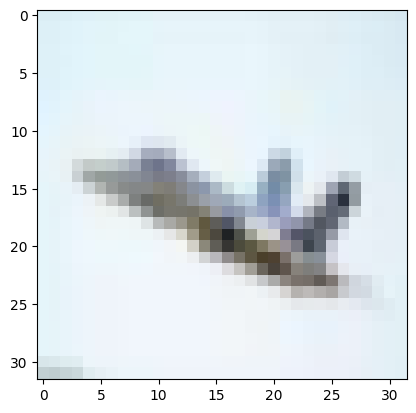

In [ ]:
# Call the function show_example with idx = 0 to display the image at index 0 from the dataset
show_example(idx = 0)